# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [4]:
import yfinance as yf

# Download Tesla stock data
tesla_data = yf.download('TSLA', start='2020-01-01', end='2023-01-01')

# Reset index
tesla_data.reset_index(inplace=True)

# Save and display the first five rows
tesla_data.head()


[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the page with Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Fetch the page content
html_data = requests.get(url).text

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, "html5lib")

# Create an empty DataFrame with columns 'Date' and 'Revenue'
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

# Find the table with Tesla Quarterly Revenue
for table in soup.find_all('table'):
    if 'Tesla Quarterly Revenue' in table.find('th').text:
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',', '').replace('$', '')

                # Append the data to the DataFrame
                tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

# Remove commas and dollar signs from the 'Revenue' column using a raw string for the regex
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r',|\$', "", regex=True)

# Remove any null or empty strings in the 'Revenue' column
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Display the last 5 rows of the DataFrame
print(tesla_revenue.tail())


Empty DataFrame
Columns: [Date, Revenue]
Index: []


In [6]:
# Download GameStop stock data
gme_data = yf.download('GME', start='2020-01-01', end='2023-01-01')

# Reset index
gme_data.reset_index(inplace=True)

# Save and display the first five rows
gme_data.head()


[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,1.5350,1.6175,1.5175,1.5775,1.5775,17814400
1,2020-01-03,1.5525,1.5625,1.4600,1.4700,1.4700,14175600
2,2020-01-06,1.4500,1.4775,1.4000,1.4625,1.4625,13579200
3,2020-01-07,1.4425,1.4575,1.3600,1.3800,1.3800,20912000
4,2020-01-08,1.3725,1.4625,1.3525,1.4300,1.4300,22517600


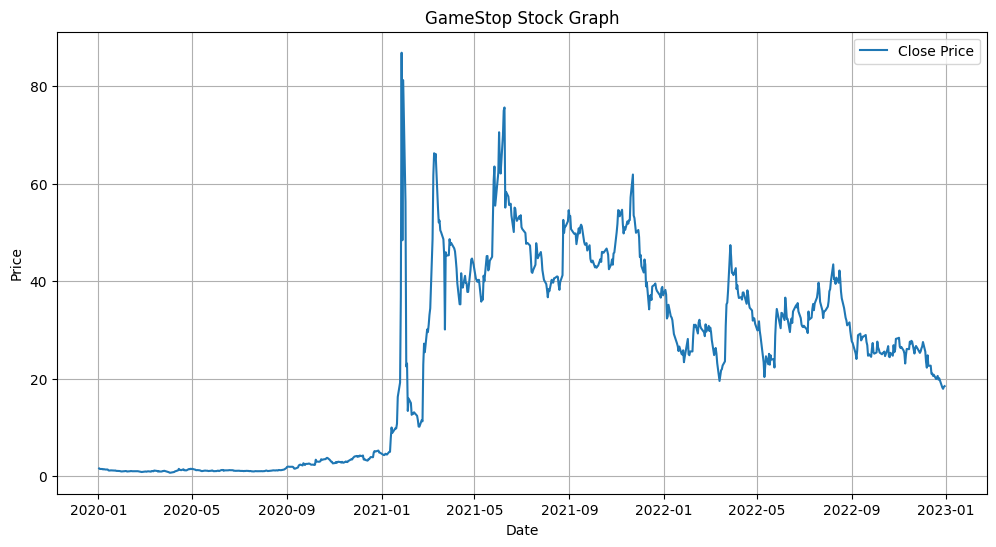

In [14]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Tesla Stock Data
make_graph(gme_data, 'GameStop Stock Graph')
